### Additional steps

In [30]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_path = Path('./data/').resolve()
!ls {data_path}

09.csv		     10.csv  products_20200901.txt  products_20201101.txt
09_prepared.pkl.bz2  11.csv  products_20201001.txt


In [4]:
with bz2.open(data_path / '09_prepared.pkl.bz2', 'rb') as f:
    df = pickle.load(f)
df.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0E05D308-5CEC-EA11-B444-005056A7539A,0,8594499,52,271,1.0,108.00,False,1087018,386563
1,2020-09-01 17:35:36,610205A1-61EC-EA11-B444-005056A7539A,0,1452388,52,271,1.0,108.00,False,199266,2676152
2,2020-09-01 19:19:21,8AF19602-70EC-EA11-B444-005056A7539A,0,3493538,52,271,1.0,107.95,False,444332,3832560
3,2020-09-01 21:53:34,EB6C71A3-84EC-EA11-B444-005056A7539A,0,2491281,52,271,1.0,108.00,False,325059,6489899
6,2020-09-01 19:50:31,1B34A539-74EC-EA11-B444-005056A7539A,0,4119786,61,97,1.0,56.00,False,533043,750155


In [6]:
df.drop(['id_card', 'id_doc'], axis=1, inplace=True)
df.head()

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0,52,271,1.0,108.00,False,1087018,386563
1,2020-09-01 17:35:36,0,52,271,1.0,108.00,False,199266,2676152
2,2020-09-01 19:19:21,0,52,271,1.0,107.95,False,444332,3832560
3,2020-09-01 21:53:34,0,52,271,1.0,108.00,False,325059,6489899
6,2020-09-01 19:50:31,0,61,97,1.0,56.00,False,533043,750155


In [7]:
with bz2.open(data_path / '09_stats.pkl.bz2', 'wb') as f:
    pickle.dump(df, f, protocol=4)

### Statistics

In [3]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2

data_path = Path('./data/').resolve()
!ls {data_path}

09.csv		     10.csv		    products_20201001.txt
09_prepared.pkl.bz2  11.csv		    products_20201101.txt
09_stats.pkl.bz2     products_20200901.txt


In [4]:
with bz2.open(data_path / '09_stats.pkl.bz2', 'rb') as f:
    df = pickle.load(f)
df.head()

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0,52,271,1.0,108.00,False,1087018,386563
1,2020-09-01 17:35:36,0,52,271,1.0,108.00,False,199266,2676152
2,2020-09-01 19:19:21,0,52,271,1.0,107.95,False,444332,3832560
3,2020-09-01 21:53:34,0,52,271,1.0,108.00,False,325059,6489899
6,2020-09-01 19:50:31,0,61,97,1.0,56.00,False,533043,750155


In [6]:
df.describe()

,id_order,id_tov,id_kontr,quantity,sum,id_card_int,id_doc_int
count,2.852438e+07,2.852438e+07,2.852438e+07,28524380.0,2.852438e+07,2.852438e+07,2.852438e+07
mean,7.020252e+05,1.895174e+04,9.700366e+03,1.0,9.766120e+01,6.081191e+05,3.527758e+06
std,1.946234e+06,1.062585e+04,8.968722e+03,0.0,8.340158e+01,3.752226e+05,2.037357e+06
min,0.000000e+00,5.200000e+01,-9.999000e+03,1.0,-1.000000e-02,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.533900e+04,3.390000e+02,1.0,4.400000e+01,2.763528e+05,1.763322e+06
50%,0.000000e+00,2.049300e+04,1.335400e+04,1.0,7.600000e+01,5.963480e+05,3.527626e+06
75%,0.000000e+00,2.526200e+04,1.564500e+04,1.0,1.329200e+02,9.226680e+05,5.291896e+06
max,6.673056e+06,3.858700e+04,2.194300e+04,1.0,6.400000e+03,1.319455e+06,7.057696e+06


In [8]:
df['day'] = df['date'].dt.date
df.head()

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int,day
0,2020-09-01 17:01:25,0,52,271,1.0,108.00,False,1087018,386563,2020-09-01
1,2020-09-01 17:35:36,0,52,271,1.0,108.00,False,199266,2676152,2020-09-01
2,2020-09-01 19:19:21,0,52,271,1.0,107.95,False,444332,3832560,2020-09-01
3,2020-09-01 21:53:34,0,52,271,1.0,108.00,False,325059,6489899,2020-09-01
6,2020-09-01 19:50:31,0,61,97,1.0,56.00,False,533043,750155,2020-09-01


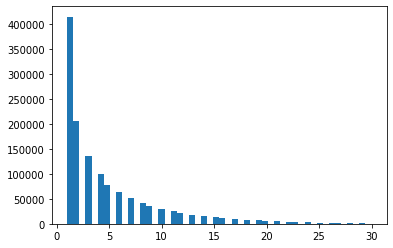

In [17]:
card_unique_days = df.groupby(['id_card_int'])['day'].nunique()
card_unique_days = card_unique_days.sort_values(ascending=False)
fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, rectangles = ax.hist(card_unique_days, 50)
fig.canvas.draw()
plt.show()

<AxesSubplot:>

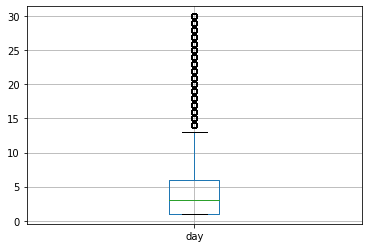

In [18]:
pd.DataFrame(card_unique_days).boxplot()

In [39]:
card_unique_days = pd.DataFrame(card_unique_days)
good_cards = card_unique_days[card_unique_days['day'] <= 15]
good_cards = good_cards.reset_index()

In [40]:
df['id_card_int'].nunique() - len(good_cards)

66744

In [43]:
bad_cards = card_unique_days[card_unique_days['day'] > 15]
bad_cards = bad_cards.reset_index()
100*(len(bad_cards) / len(df))

0.2339893101971016

In [44]:
list_good_cards = set(good_cards['id_card_int'])
doc_card_day_sum_clean = df[df.id_card_int.isin(list_good_cards)]
len(doc_card_day_sum_clean)

21846117

In [45]:
len(doc_card_day_sum_clean['id_card_int'].unique())

1252712

In [46]:
doc_card_day_sum_clean_grouped = doc_card_day_sum_clean.groupby(['id_card_int','day'])
doc_card_day_sum_clean_grouped_sum = doc_card_day_sum_clean_grouped.sum()
doc_card_day_sum_clean_grouped_sum_index = doc_card_day_sum_clean_grouped_sum.reset_index()
doc_card_day_sum_clean_grouped_sum_index.max()

id_card_int       1319455
day            2020-09-30
id_order        853318158
id_tov            2945003
id_kontr          1898896
quantity            133.0
sum               18768.0
is_green              106
id_doc_int      585135684
dtype: object

In [47]:
doc_card_day_sum_clean_grouped_sum_index.mean()

id_card_int    6.331002e+05
id_order       3.283660e+06
id_tov         8.322610e+04
id_kontr       4.245488e+04
quantity       4.427081e+00
sum            4.415630e+02
is_green       3.049344e-01
id_doc_int     1.561812e+07
dtype: float64

In [48]:
doc_card_day_sum_clean_grouped_sum_index.median()

id_card_int      625573.00
id_order              0.00
id_tov            61232.00
id_kontr          31686.00
quantity              3.00
sum                 308.69
is_green              0.00
id_doc_int     10201500.00
dtype: float64

In [31]:
print(
    np.percentile(doc_card_day_sum_clean_grouped_sum_index['sum'], q=75),
    np.percentile(doc_card_day_sum_clean_grouped_sum_index['sum'], q=95),
    np.percentile(doc_card_day_sum_clean_grouped_sum_index['sum'], q=99)
)

576.0 1278.0 2099.0


<AxesSubplot:>

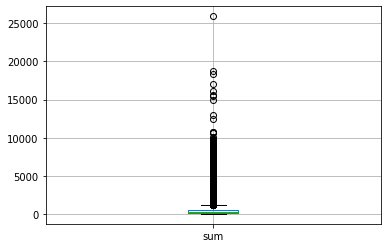

In [32]:
pd.DataFrame(doc_card_day_sum_clean_grouped_sum_index['sum']).boxplot()

In [34]:
doc_card_day_sum_clean_grouped_sum_index[doc_card_day_sum_clean_grouped_sum_index['sum'] > 10000]

,id_card_int,day,id_order,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
246,39,2020-09-10,0,681176,393313,20.0,16990.00,0,42916292
97667,17117,2020-09-05,0,420439,184797,12.0,10584.00,0,63080890
491155,91978,2020-09-15,0,2290280,1271101,107.0,16152.00,0,331928280
641299,120675,2020-09-07,0,549973,305672,16.0,18356.00,0,76843192
965023,183408,2020-09-07,0,1339119,817155,54.0,10715.34,0,139838814
2092580,415738,2020-09-03,73383401,1795425,979572,74.0,13012.00,0,228473364
2092585,415738,2020-09-09,158207958,2180032,623283,84.0,25938.00,0,133191482
2217060,442953,2020-09-14,60267810,2790692,1469047,122.0,12422.60,41,417082139
2590671,523690,2020-09-21,0,653116,398318,21.0,10152.40,1,46743360
3633714,752214,2020-09-10,0,541768,318051,15.0,15430.00,0,40703985


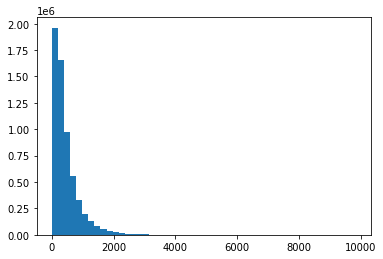

In [37]:
bad_cards = doc_card_day_sum_clean_grouped_sum_index[doc_card_day_sum_clean_grouped_sum_index['sum'] > 10000]
bad_cards = list(bad_cards['id_card_int'].unique())
final_clean = doc_card_day_sum_clean_grouped_sum_index[~doc_card_day_sum_clean_grouped_sum_index.id_card_int.isin(bad_cards)]
fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, rectangles = ax.hist(final_clean['sum'], 50)
fig.canvas.draw()
plt.show()

<AxesSubplot:>

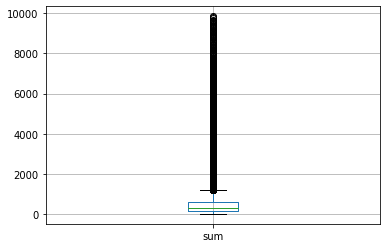

In [38]:
pd.DataFrame(final_clean['sum']).boxplot()